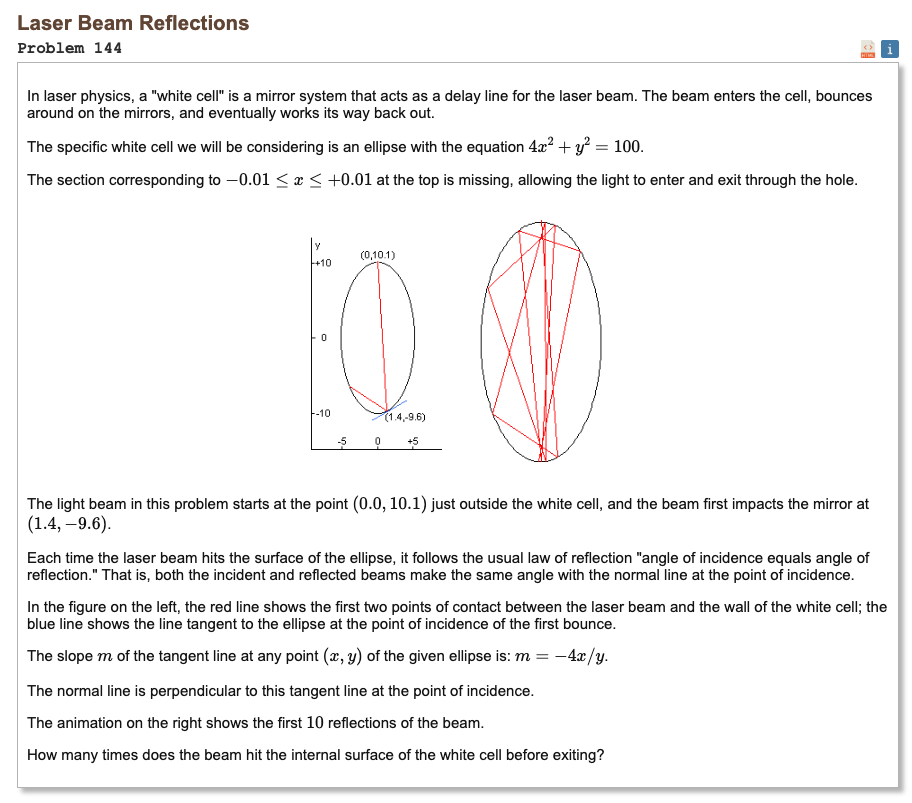

## Initial approach

* the ellipse is 4x² + y² = 100 with a small hole near the top along |x| ≤ 0.01 and y > 0
* start from (0, 10.1) entering to first hit at (1.4, −9.6) then reflect at each bounce
* use the gradient ∇F=(8x, 2y) of the ellipse as the surface normal at any contact point
* reflect the incoming direction vector v to v′ by v′ = v − 2·projₙ(v) where n is the unit normal
* from the hit point follow the new ray and find the next intersection with the ellipse by solving a quadratic
* repeat until the ray exits through the hole condition at the top
* count the number of internal reflections before exiting
* careful numeric tolerances avoid picking the current point again when solving the quadratic

In [1]:
import math

def reflect(vx, vy, nx, ny):
    nl = math.hypot(nx, ny)
    nx /= nl
    ny /= nl
    dot = vx*nx + vy*ny
    rx = vx - 2*dot*nx
    ry = vy - 2*dot*ny
    return rx, ry

def next_hit(x0, y0, vx, vy):
    A = 4*vx*vx + vy*vy
    B = 2*(4*x0*vx + y0*vy)
    C = 4*x0*x0 + y0*y0 - 100
    disc = B*B - 4*A*C
    t1 = (-B + math.sqrt(disc)) / (2*A)
    t2 = (-B - math.sqrt(disc)) / (2*A)
    t = t1 if t1 > t2 else t2
    if t < 1e-10:
        t = t1 if t2 < 1e-10 else t2
    x = x0 + t*vx
    y = y0 + t*vy
    return x, y

def solve():
    x_prev, y_prev = 0.0, 10.1
    x, y = 1.4, -9.6
    hits = 0
    while True:
        if abs(x) <= 0.01 and y > 0:
            break
        vx = x - x_prev
        vy = y - y_prev
        nx, ny = 8*x, 2*y
        rvx, rvy = reflect(vx, vy, nx, ny)
        x_next, y_next = next_hit(x, y, rvx, rvy)
        x_prev, y_prev = x, y
        x, y = x_next, y_next
        hits += 1
    return hits

result = solve()
print("Result:", result)

Result: 354
